In [74]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Loading and Initial Exploration

In [94]:
# loading the dataset
file_path = "titanic3.xls"
df = pd.read_excel(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Before preprocessing and feature engineering, we must understand the dataset to identify inconsistencies before modeling as well as revealing patterns/distributions helpful for preprocessing decisions.

1. Checking Dataset Structure 
Firstly, I began by checking some basic information such as the shape of the dataset as well as the column names, to check the number of rows we have and columns (features), and to gain a general overview of what data we have to analyze. 

2. Identifying Missing Values
Missing data can affect the model's accuracy, so it is very important to assess which features have missing values. After observation, I noticed: 
- age is missing for 263 passengers 
- fare is missing for 1 passengers 
- cabin is missing for 1014 passengers
- embarked is missing for 2 passengers 
- boat is missing for 823 passengers 
- body is missing for 1188 passengers 
- home.dest is missing for 564 passengers 
We can see that cabin, boat, and body have an extremely high number of missing values, which might make them not useful.
Home.dest also has lots of missing values, though fewer than the others.
Age, fare, and embarked have much fewer missing values, which means they could still be useful with appropriate handling.

3. Summary Statistics Observations
After checking the missing values, .describe() and .info() are used to view summary statistics about the dataset. Some key observations include:
Age:
- a minimum age of 0.17 years (babies) 
- a maximum age of 80 years. 
Fare:
- Some passengers paid $0, which could be an error or maybe a special case. 
Pclass:
- Most passengers were in 3rd class, which confirms a class imbalance.
Additionally, I was able to view the different datatypes of the features in my dataset using .info(), as well as confirm which features contain missing values, allowing me to fully understand my data before working with it.

In [124]:
# basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)

# check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# summary statistics
df.info()
df.describe()

Dataset Shape: (1309, 14)

Column Names:
 Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Missing Values:
 pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Visualizing data helps in understanding missing values, identifying patterns based on features such as gender, class, and age, and spotting imbalances that might affect model predictions.

1. Heatmap of Missing Values
Although I quantitatively observed missing values  earlier, a heatmap provides a visual aid for recognizing missing data across the different columns and helps determine if a column is too incomplete to be useful. 
- Cabin, boat, and body have too many missing values, making them hard to work with.
- Age and embarked have less missing values, meaning they might still be useful for prediciton.

2. Survival by Gender
This visualization helps check whether gender impacted survival rates.
- The countplot shows that more men died compared to women (possibly due to the women and children first rule).
From this, we can infer gender is going to be an important feature for predicting survival.

3. Survival by Passenger Class
This allows us to check if ticket class could have affected chance of survival.
- 1st class passengers had higher survival rates
- 3rd class passengers had the highest death rate 
This suggets that the wealthier passengers had better access to lifeboats, and we can therefore infer that class is related to survival and that we should include it in our model.

4. Age Distribution of Survivors vs Non-survivors
This allows us to see if age could have affected survival rates.
- Children had higher survival rates (again, women and children first rule).
- Elderly passengers had lower survival rates, possibly due to physical limitations in evacuations.
- Adults (20-40) had more non-survivors than survivors, but survival was still present across the group. 
Since survival varies across different age ranges, categorizing passengers into age groups may improve model performance compared to using raw age values.

Summary of insights gathered:
- Columns with too many missing values may be dropped, while others imputed.
- Gender, class, and age are all likely important factors.
- Age could benefit from categorization into groups.

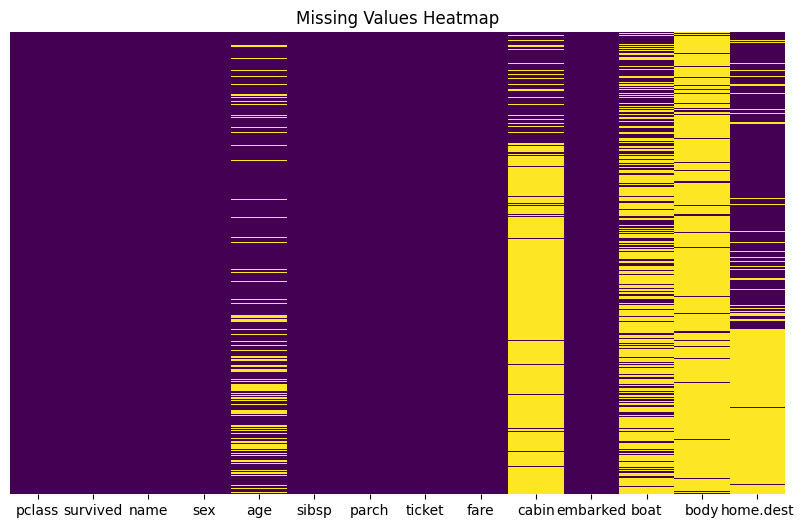

In [96]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

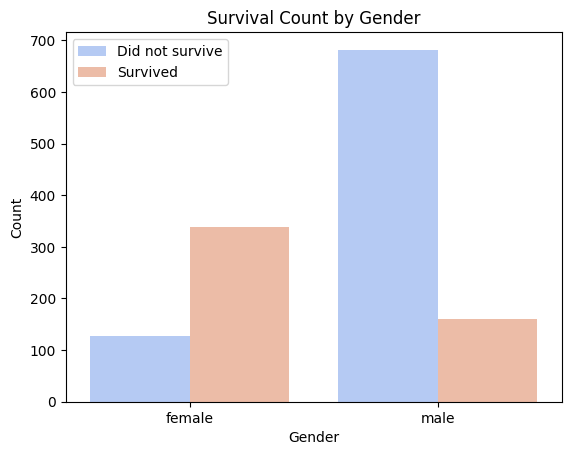

In [97]:
sns.countplot(data=df, x='sex', hue='survived', palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Did not survive", "Survived"])
plt.show()

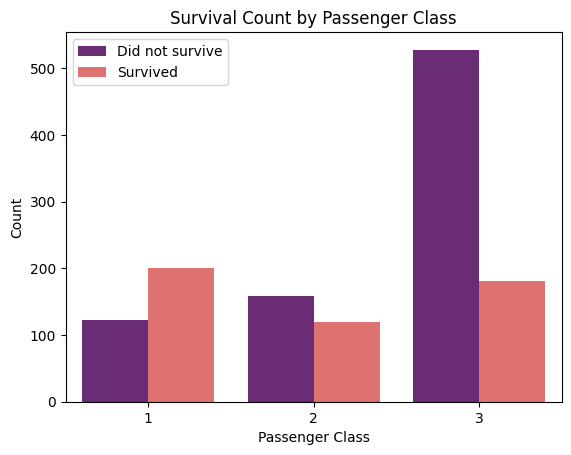

In [98]:
sns.countplot(data=df, x='pclass', hue='survived', palette='magma')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Did not survive", "Survived"])
plt.show()

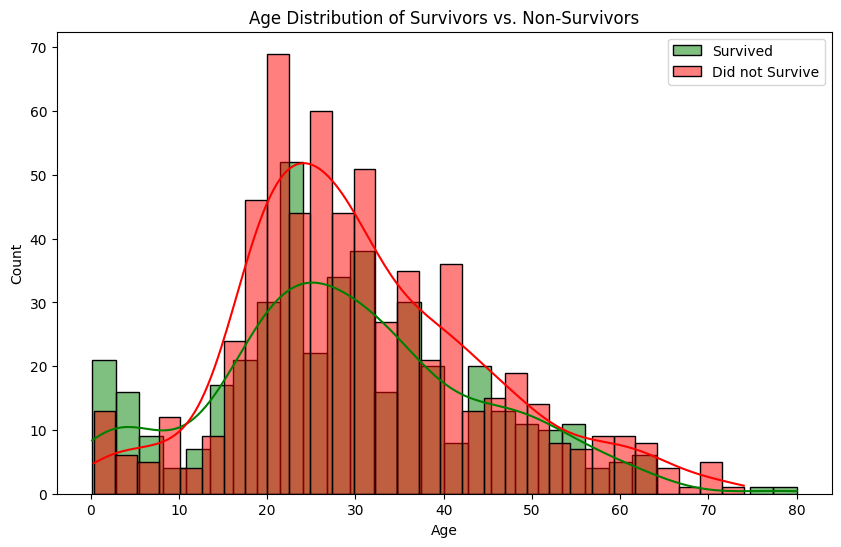

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['survived'] == 1]['age'], bins=30, kde=True, color="green", label="Survived")
sns.histplot(df[df['survived'] == 0]['age'], bins=30, kde=True, color="red", label="Did not Survive")
plt.legend()
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Another visualization method I thought to use was to compare survival rates by different features I considered relevant to survival, and see if there is any correlation or meaningful insights to be found.

1. Sex and survival
I first began by checking sex, as it is very likely that the "women and children first" rule was followed. If this policy influenced survival rates, we would expect females to have a higher survival rate than men. The barplot confirmed this, with around 70% of females surviving but only 20% of males surviving. From this, I can assume that gender impacted survival chances.

2. Pclass and survival
Then, I checked the passenger class, since higher class passengers were physically closer to the safety exits and had better accomodations in general, meaning more access to lifeboats. If class did affect survival, the first class passengers would have the highest survival rate, then second then third. The barplot confirmed this pattern and asserted that richer passengers had better survival chances.

3. Age group and survival
To explore whether age impacted survival, I categorized passengers into age groups. I decided to check age because the "women and children first" rule implies that younger passengers were given priority. The results showed that children had the highest chances of survival, whilst seniors had the lowest. This confirmed that younger passengers were indeed more likely to survive.

4. Family size and survival
I then analyzed the potential impact of family size on survival. I thought to do this since larger families might struggle to get everyone on lifeboats, giving smaller families a better chance of escape. To checl this I derived a family size variable, which came from adding num of siblings and parents/children of a passenger. The results showed that passengers with a family size of 3 had the highest survival rate, but the rate dropped sharply for families larger than that. This suggested that large famililies could have struggled evacuating together.

5. Fare price and survival
Finally, I checked if a higher fare meant a higher survival rate. Although related, fare and pclass are not exactly the same. My decision to test this was due to my understanding that by grouping fare, I can check if survival depends on the ticket price within each class instead of just the class label. The results showed that higher fares had higher survival rates, implying a relationship.

The analysis above focuses on exploring patterns in data, however some transformations (grouping ages, finding family size, categorizing fare prices) are forms of feature engineering. These were done in EDA to gain insights, and will be useful later during feature selection. Feature engineering during EDA can be useful for identifying patterns that are not immediately present in raw data, helps provide intuition for which transformations could improve a model, and allows to test ideas/hypotheses before deciding on a final feature set. In the feature selection task, it will be decided if these derived features actually add value to the model or if they are just redundant.

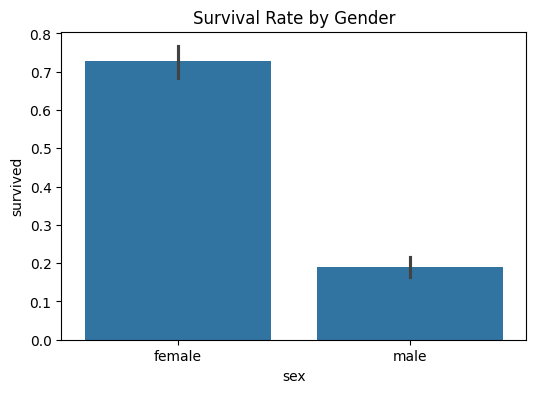

In [100]:
# survival Rate by sex
plt.figure(figsize=(6,4))
sns.barplot(x="sex", y=df["survived"], data=df)
plt.title("Survival Rate by Gender")
plt.show()

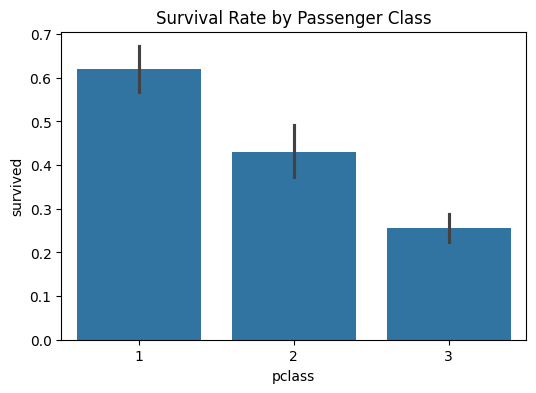

In [101]:
# survival rate by passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x="pclass", y=df["survived"], data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

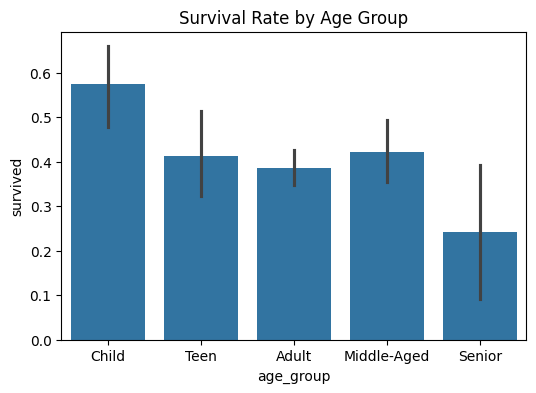

In [102]:
# age groups
df["age_group"] = pd.cut(df["age"], bins=[0, 12, 18, 40, 60, 100], labels=["Child", "Teen", "Adult", "Middle-Aged", "Senior"])

# survival rate by age group
plt.figure(figsize=(6,4))
sns.barplot(x="age_group", y=df["survived"], data=df, order=["Child", "Teen", "Adult", "Middle-Aged", "Senior"])
plt.title("Survival Rate by Age Group")
plt.show()

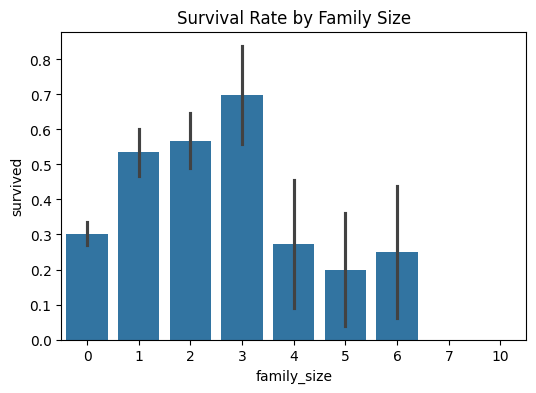

In [103]:
# family size
df["family_size"] = df["sibsp"] + df["parch"]

# survival rate by family size
plt.figure(figsize=(6,4))
sns.barplot(x="family_size", y=df["survived"], data=df)
plt.title("Survival Rate by Family Size")
plt.show()

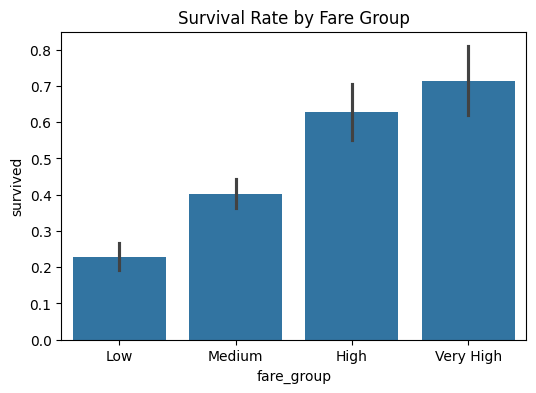

In [104]:
# fare groups
df["fare_group"] = pd.cut(df["fare"], bins=[0, 10, 50, 100, 600], labels=["Low", "Medium", "High", "Very High"])

# survival rate by fare group
plt.figure(figsize=(6,4))
sns.barplot(x="fare_group", y=df["survived"], data=df)
plt.title("Survival Rate by Fare Group")
plt.show()

Since EDA is meant to explore patterns rather than modifying the dataset permanently before feature selection, I decided to drop the new features after analysis. This way, insights are gained, but the dataset goes back to its original state.

In [105]:
# only temporary features
df.drop(columns=["family_size", "age_group", "fare_group"], inplace=True)

Finally, I felt it was important to analyze the distributions of my data, specfically the numerical features. Understanding these distributions would help with identifying any skewness, outliers, or scaling issues that might impact the model. This will also be helpful later when deciding which scaling techniques are needed, if any.
Instead of automatically selecting numerical features using select_dtypes(), I manually selected them based on dataset knowledge. I preferred this method because sometimes, some columns (for example pclass) are classified as numerical due to their integer values, but are actually categorical. I selected age, sibsp, parch, and fare for numerical features.

The results showed that age is slightly right skewed, with most passengers being between 20-40 years old. Both sibsp and parch is highly skewed towards 0, so most passengers traveled alone. Fare is heavily skewed as well, implying some passengers paid very high fares, indicating potential outliers. 
These interpretations will be useful later when determining which transformations might be necessary, such as scaling/normalization.

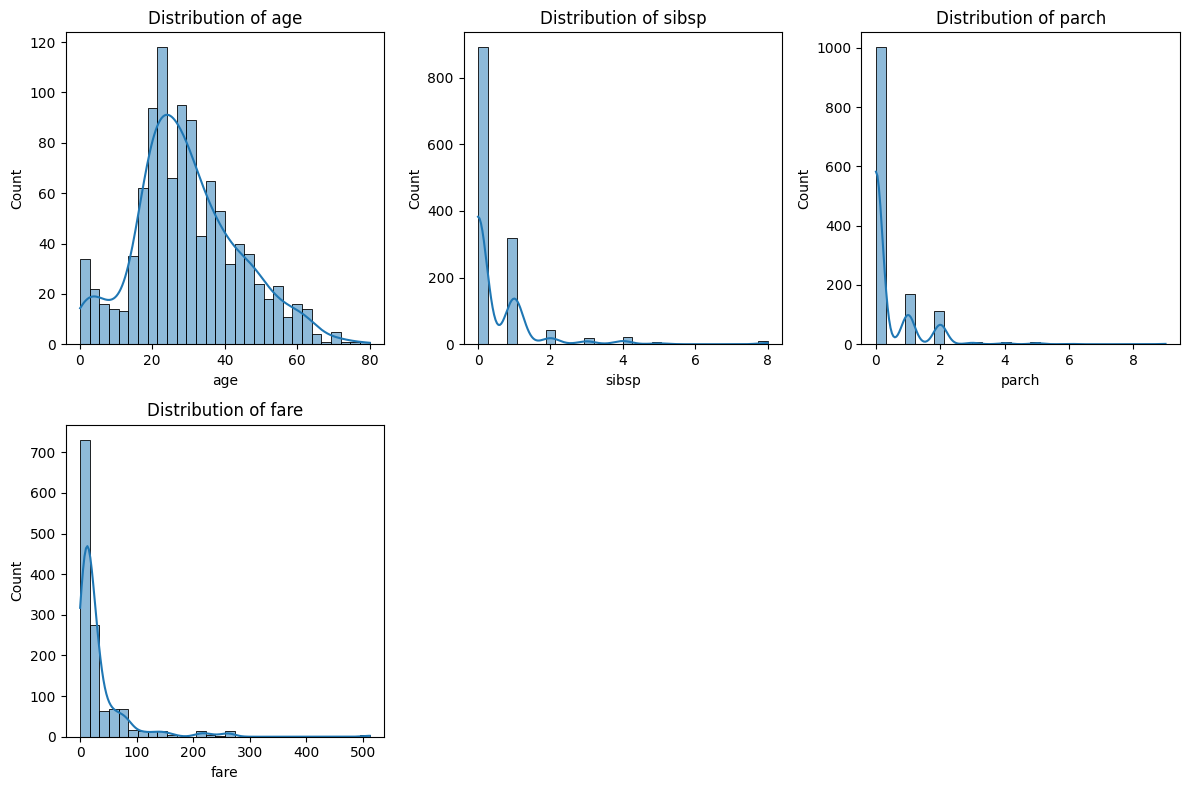

In [106]:
# numerical features
numerical_features = ["age", "sibsp", "parch", "fare"]

# plot distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

Since extreme values in numerical features can mess up the model's predictions, I decided to do a formal outlier check on my features. Outliers can affect the model in many different ways. Some could be errors or rare causes that we should handle by alone, while others could have some meaningful insights. Checking them early on helps with deciding if we should remove, transform, or keep them later for preprocessing.
Using boxplots to identify potential outliers, I discovered that::
- Age had a few outliers above 70, but they are still reasonable values, and just represent elderly passengers
- Sibsp and parch both have some extreme values, suggesting most passengers traveled by themslves, or that some traveled as a large family.
- Fare had many extreme outliers, with some of the fares being even more than 500. This indicates ticket prices were very varied, probably due to class differences.

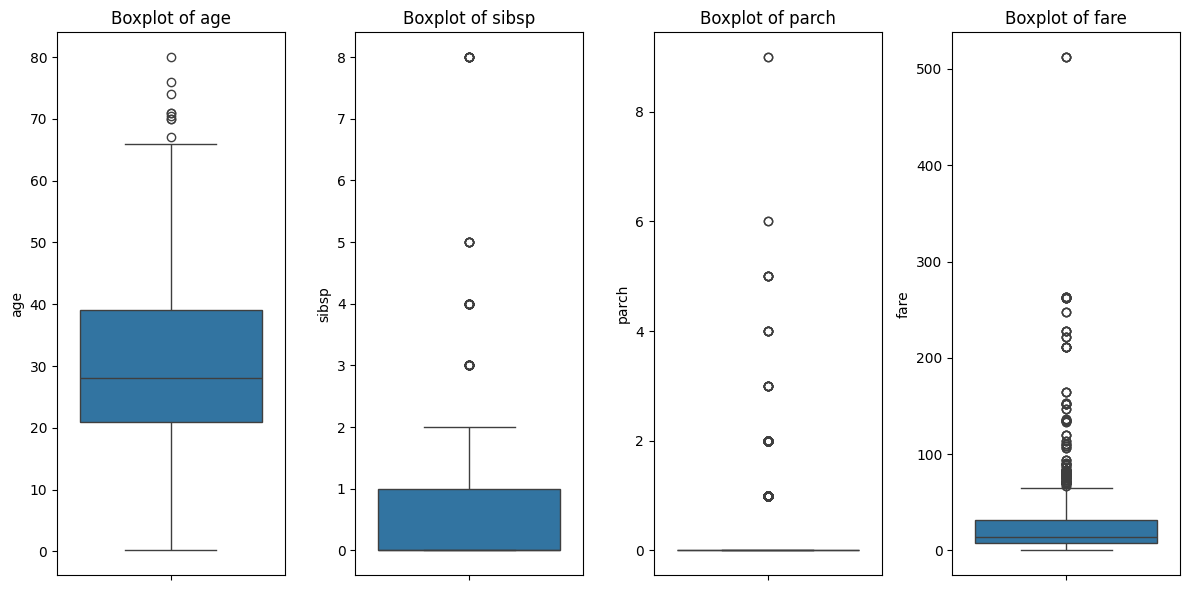

In [107]:
# features to check for outliers
outlier_features = ["age", "sibsp", "parch", "fare"]

plt.figure(figsize=(12, 6))

# create boxplots for each feature
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

Finally, the last EDA step I thought to perform was correlation analysis between the numerical features. Upon research, I came to understand that correlation analysis can help identify relationships and provide insights about how they interact. It can also provide important insights when it comes to feature selection, as if two features are highly correlated, one might be redundant and we can remove it and effectively reduce dimensionaltiy. This will be very useful later, during feature selection. 

I initially considered alternatives but eventually decided to go with a heatmap for two main reasons:
1. It is color coded, making it easy to spot strong/weak correlations. This makes it more convenient than using raw correlation tables.
2. It allows to compare mutliple features at once, rather than checking individual pairwise scatterplots.

The results showed:
- Sibsp and parch had the highest correlation (0.37). This made sense since if a passenger was traveling with siblings/spouses they were probably also traveling with parents/children.
- Age had weak negative correlations with sibsp (-0.24) and parch (-0.15), which implies younger passengers were more likely to travel with family.
- Fare had relatively low correlation with all of the other features, so it might behave independently.
- No features showed extremely high correlations (>0.8), so it is difficult to deduce any obvious redundancies.

This analysis would normally provide more direct/obvious insights when it comes to feature selection, however in this case it seems there are no features that clearly need removal due to high correlation. Nevertheless, sibsp and parch have the highest correlation, so I will keep this in mind during feature selection later.

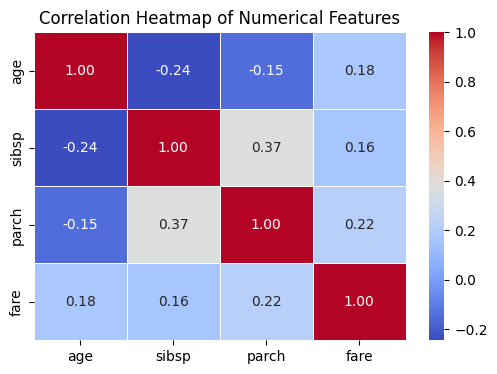

In [114]:
# numeric columns
numerical_features = ["age", "sibsp", "parch", "fare"]

# correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Task 2: Data Splitting

Although data splitting is task 5 in the instructions, after careful review, I have decided to move task 5 to task 2 to prevent data leakage. There are two main reasons for my choice:

1. Imputting missing values before splitting means computed values (such as median) would be based on the entire dataset, which would include the test and validation sets. This allows data that the model will be tested/validated on later to influence training data, which would lead to overly good results.


2. If we scale features before splitting, the mean and standard deviation are computed from the entire dataset, which means that test data would influence how the training data is transformed, leading to data leakage. 

The dataset was divided into training (80%), validation (10%), and test (10%) sets. Stratification was used on survived, so that the percentage of survivors is consistent across all splits. Without stratification, there might be too many survivors randomly assigned to one set and too little to another, which would lead to unreliable model training.

1. First split (80% training, 20% others):
- The training set should be the largest portion, since it is used to train the model
- Random state is set to 2025, for reproducibility

2. Second split (10% validation, 10% test):
- The validation set is used to tune hyperparameters and prevent overfitting.
- The test set allows for an unbiased evaluation of the model performance

The decision of 80 10 10 is based on a general rule of thumb, especially since the dataset is relatively large.

In [41]:
# defining the target variable
y = df["survived"]  # target column to predict
X = df.drop(columns=["survived"])  # features we use to make predictions

# first split: training (80%) and others (20%)
X_train, X_other, y_train, y_other = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2025
)

# second split: validation (10%) and test (10%) from 'others'
X_val, X_test, y_val, y_test = train_test_split(
    X_other, y_other, test_size=0.5, stratify=y_other, random_state=2025
)

# confirming the shape of the splits
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


Training Set: (1047, 13) (1047,)
Validation Set: (131, 13) (131,)
Test Set: (131, 13) (131,)


# Task 3: Managing Missing Values

When managing missing values, I used only the training set to make decisions about handling missing values (dropping/imputing). This helps prevent data leakage, and also avoids inconsistencies across the dataset splits. 
My reasoning behind this comes from the actual purpose of the validation and test sets. Their purpose is to evaluate the model, not to influence any preprocessing decisions. The test set and validation set should stay unseen by the model during preprocessing decisions, otherwise the model would indirectly learn from them and cause a data leakage. 
Hence, I checked missing values only in X_train, since it is the main dataset for learning patterns. All transformations are first applied to X_train and then  applied to X_test and X_val to ensure consistency.

To fully understand the missing data, I began by printing missing values in the training set. To decide whether to drop or impute missing values, I used a common rule of thumb widely used for smaller projects:
- If a column had more than 30% missing values, it was deemed unhelpful and was therefore dropped.
- If a column had less than 30% missing values, it was imputed instead. Numerical data was imputed using the median to handle outliers, and categorical data was imputed using the mode for the most frequent value.
Upon further research, I found that advanced projects employ more complex techniques, such as KNN imputation or multiple imputation for better accuracy. However, for this dataset, I chose to use the percentage threshold for a simple yet effective method.

In [42]:
# check missing values in the training set before handling missing data
print("Missing values in Training Set:\n", X_train.isnull().sum())

Missing values in Training Set:
 pclass         0
name           0
sex            0
age          203
sibsp          0
parch          0
ticket         0
fare           1
cabin        803
embarked       2
boat         659
body         948
home.dest    446
dtype: int64


In [43]:
missing_percent = (X_train.isnull().sum() / len(X_train)) * 100
print(missing_percent)

pclass        0.000000
name          0.000000
sex           0.000000
age          19.388730
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.095511
cabin        76.695320
embarked      0.191022
boat         62.941738
body         90.544413
home.dest    42.597899
dtype: float64


After analyzing the missing data, we can see that cabin (76.70%), boat (62.94%), body (90.54%) and home.dest (42.60%) are all greater than the 30% missing value threshold. Hence, these columns are dropped from all three sets, as there is too much missing data for these columns to be of any use.

On the other hand, we can see that age (19.39%), fare (0.10%), and embarked (0.19%) are less than the 30% threshold, hence we can use imputation instead. Since age is numerical it is imputed with the median to handle outliers. Fare is also numerical and only has a tiny fraction of missing values, so it is also imputed with the median. Embarked is categorical, hence it is imputed with the mode.

In [44]:
cols_to_drop = ["cabin", "boat", "body", "home.dest"]

X_train.drop(columns=cols_to_drop, inplace=True)
X_val.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

There are multiple ways to handle missing values. The first one that came to mind and that felt the most intuitive was to manually compute the median and fill in missing values using .fillna(). However, upon further research, I decided to use SimpleImputer for 3 main reasons:
1. Efficiency, as the process is automated and less repetitive.
2. Consistency, as it ensures the same imptuation method is applied across multiple columns at once.
3. Scalability, as if I had to apply imputation to more features, SimpleImputer would make the code more compact.

For the imputation strategy, I used the median for the numerical features (age, fare) instead of the mean since it is more resistant to outliers. For embarked, the mode was used since it is categorical. Since SimpleImputer outputs a NumPy array, .ravel() was used to convert it into a 1D array before assigning it back to the DataFrame, ensuring embarked stays categorical. 
Although I could have created separate imputers for age and fare, both features use the same imputation strategy (median). To keep the code more efficient and maintainable, I decided to use a single imputer for all numerical features. Since embarked is categorical and requires mode imputation, it needed a separate imputer. 
During imputation, it is important to fit only on the training set and then apply that transformation to the test set and validation set. The reason for this is to prevent data leakage:
- Applying fit() to only the training set means the median is calculated using only the training data. 
- If we use fit() on the test/validation sets, then the model would indirectly learn from them, causing false high model performance. 

After fitting, transform() is used on all 3 sets to fill in the missing data using the same median computed from the training set. For the training set, fit_transform() was used instead of fit() then transform() separately, for efficiency and code readability. By following this approach, we effectively ensured that the test and validation sets stay untouched during training, allowing our results to be realistic and reliable.

In [ ]:
# create imputers for each feature and choose strategy
num_imputer = SimpleImputer(strategy="median")  # for numerical features
cat_imputer = SimpleImputer(strategy="most_frequent")  # for categorical features

# fit & transform the TRAINING set
X_train[["age", "fare"]] = num_imputer.fit_transform(X_train[["age", "fare"]])
X_train["embarked"] = cat_imputer.fit_transform(X_train[["embarked"]]).ravel()

# apply the same transformation to validation and test sets (transform only, NO FITTING again)
X_val[["age", "fare"]] = num_imputer.transform(X_val[["age", "fare"]])
X_val["embarked"] = cat_imputer.transform(X_val[["embarked"]]).ravel()

X_test[["age", "fare"]] = num_imputer.transform(X_test[["age", "fare"]])
X_test["embarked"] = cat_imputer.transform(X_test[["embarked"]]).ravel()

Finally, after handling the missing data, I confirmed that there are no more missing values in any of the sets before moving on.

In [47]:
# check missing values in each set after handling missing data, to confirm no missing values
print("Missing values in Training Set:\n", X_train.isnull().sum())
print("\nMissing values in Validation Set:\n", X_val.isnull().sum())
print("\nMissing values in Test Set:\n", X_test.isnull().sum())

Missing values in Training Set:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Missing values in Validation Set:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Missing values in Test Set:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


# Task 4: Encoding Categorical Variables

Originally, I tried to find the categorical variables using code, by selecting all the object type columns. However, that lead to incorrect results, including categories such as name and excluding categories such as pclass. So instead, I manually selected sex, embarked, and pclass as categorical features based on dataset knowledge.

In [53]:
categorical_features = ["sex", "embarked", "pclass"]  # manually selected

print("Categorical Features:", categorical_features)

Categorical Features: ['sex', 'embarked', 'pclass']


After identifying the categorical variables, I used OneHotEncoder to convert them into numerical features. To prevent errors in the case that there is a category in the test/validation sets that was not in the training set, the parameter handle_unknown is set to ignore. The parameter sparse_output is set to false to return a dataframe rather than a sparse matrix. 

Then, we fit the encoder only on the training data (to avoid data leakage), and use the same transformation on the test and validation sets. 

The next step is to merge our newly encoded data with our old dataset, however OneHotEncoder outputs a NumPy array instead of a dataframe. So, we must assign meaningful names to the new columns. At first I thought to manually rename the columns, however this turned out to be tedious and led to unnecessary errors. Upon further research, I decided to use get_feature_names_out, which automatically generates meaningful column names. 

The encoded data was converted into a dataframe with the appropriate column names, and I dropped the old categorical columns. Initially, I considered using .reset_index(drop=True) to drop, but since no rows were removed and pd.concat() aligns data by index automatically, it was unnecessary. The newly encoded data was then merged with the original dataset.

Finally, I verified that the dataset shape has changed, increasing from 10 to 14 due to the addition of one-hot encoded features. I also printed a sample of the dataset to confirm the presence of the encoded categorical features.

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
# transform validation & test sets (DO NOT fit again)
X_val_encoded = encoder.transform(X_val[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

In [58]:
# get new column names for encoded features
encoded_columns = encoder.get_feature_names_out(categorical_features)
# convert to a dataframe with new column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoded_columns, index=X_val.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

In [59]:
# drop original categorical columns
X_train = X_train.drop(columns=categorical_features)
X_val = X_val.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# concatenate encoded features with the rest of the dataset
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_val = pd.concat([X_val, X_val_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

In [61]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

print("First few rows of X_train:")
print(X_train.head())

X_train shape: (1250, 14)
X_val shape: (249, 14)
X_test shape: (247, 14)
First few rows of X_train:
                                     name   age  sibsp  parch    ticket  \
0              Goodwin, Miss. Lillian Amy  16.0    5.0    2.0   CA 2144   
1  Johansson Palmquist, Mr. Oskar Leander  26.0    0.0    0.0    347070   
2                         Ashby, Mr. John  57.0    0.0    0.0    244346   
3                 Dick, Mr. Albert Adrian  31.0    1.0    0.0     17474   
4                        Ford, Mr. Arthur  28.0    0.0    0.0  A/5 1478   

     fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  pclass_1  \
0  46.900         1.0       0.0         0.0         0.0         1.0       1.0   
1   7.775         0.0       1.0         0.0         0.0         1.0       1.0   
2  13.000         1.0       0.0         0.0         0.0         1.0       1.0   
3  57.000         0.0       1.0         0.0         0.0         1.0       1.0   
4   8.050         1.0       0.0         0.0 

One-hot encoding has a significant impact on machine learning models, as it transforms categorical data into a numerical format that models can process. Without encoding, categorical variables might be misinterpreted as having a ranking/ordering, which can distort model predictions. One-hot encoding fixes this issue by creating separate binary features for each category. This allows models to handle categorical variables without assuming any implicit ordering or relationships. Linear models in particular benefit from one-hot encoding. 

Although it improves predictive performance and prevents categorical misinterpretation, it does have some downsides as well. It increases dataset dimensionality and the number of features in the dataset. Since there are more features, training times are also longer for certain algorithms, so feature selection might be necessary if encoding leads to too many extra features.

# Task 5: Feature Scaling